In [34]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

In [35]:
df=pd.read_csv('C:/Users/coeco/Downloads/Student performance1 - Sheet1 (1).csv')

In [36]:
df

,Gender,math_score,reading score,writing score,placement score,club join year,placement offer count
0,male,71,60,74,66,2023,1
1,female,61,68,65,72,2024,1
2,male,61,61,78,61,2022,2
3,male,78,75,76,62,2024,2
4,female,62,68,69,75,2023,1
5,male,61,66,76,63,2023,2
6,female,69,74,71,73,2022,1
7,male,60,62,67,77,2022,1
8,female,70,79,69,63,2023,1


In [122]:
df['math_score']=df['math_score'].fillna(df['math_score'].mean())
df['reading score']=df['reading score'].fillna(df['reading score'].mean())
df['writing  score']=df['writing score'].fillna(df['writing score'].mean())
df['placement score']=df['placement score'].fillna(df['placement score'].mean())
df['placement offer count']=df['placement offer count'].fillna(df['placement offer count'].mean())

In [39]:
df

,Gender,math_score,reading score,writing score,placement score,club join year,placement offer count
0,male,71,60,74,66,2023,1
1,female,61,68,65,72,2024,1
2,male,61,61,78,61,2022,2
3,male,78,75,76,62,2024,2
4,female,62,68,69,75,2023,1
5,male,61,66,76,63,2023,2
6,female,69,74,71,73,2022,1
7,male,60,62,67,77,2022,1
8,female,70,79,69,63,2023,1


##Handling Outliers

###1. Detecting outliers using Boxplot:

In [40]:
df.columns

Index(['Gender', 'math_score', 'reading score', 'writing score',
       'placement score', 'club join year', 'placement offer count'],
      dtype='object')

In [41]:
from sklearn import preprocessing
le=preprocessing.LabelEncoder()

In [43]:
df['Gender']=le.fit_transform(df['Gender'])

In [44]:
df

,Gender,math_score,reading score,writing score,placement score,club join year,placement offer count
0,1,71,60,74,66,2023,1
1,0,61,68,65,72,2024,1
2,2,61,61,78,61,2022,2
3,1,78,75,76,62,2024,2
4,0,62,68,69,75,2023,1
5,1,61,66,76,63,2023,2
6,0,69,74,71,73,2022,1
7,1,60,62,67,77,2022,1
8,0,70,79,69,63,2023,1


In [85]:
col=['Gender','math_score', 'reading score', 'writing score',
       'placement score',  'placement offer count']

In [86]:
import matplotlib.pyplot as plt

%matplotlib inline

<AxesSubplot:>

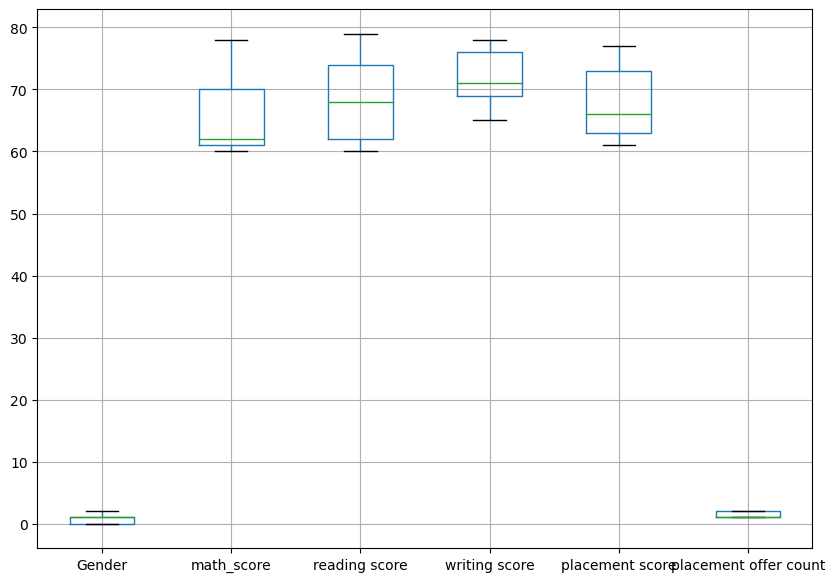

In [87]:
  plt.figure(figsize=(10,7))
df.boxplot(col)

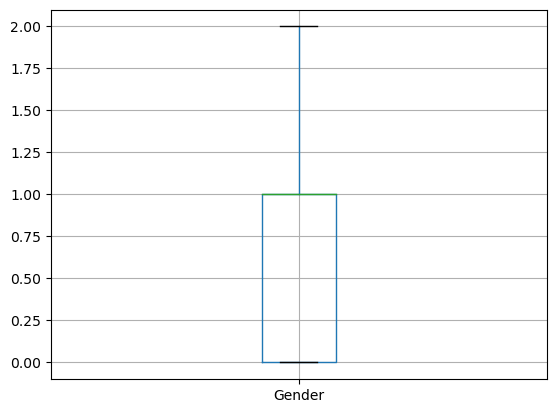

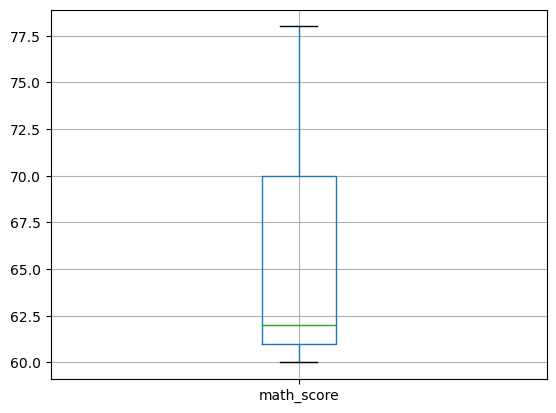

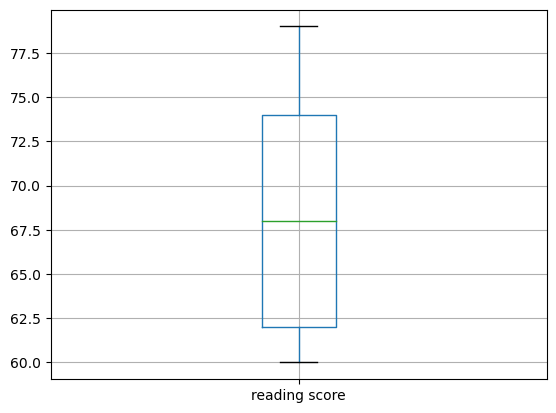

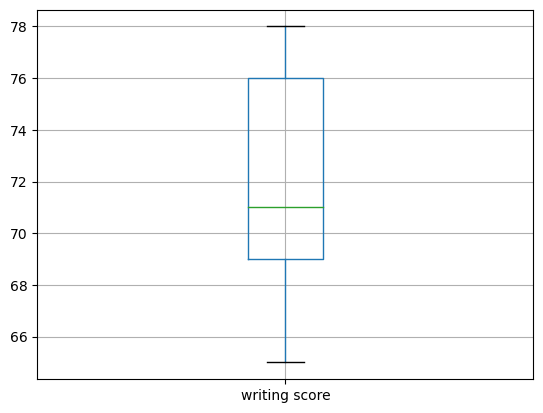

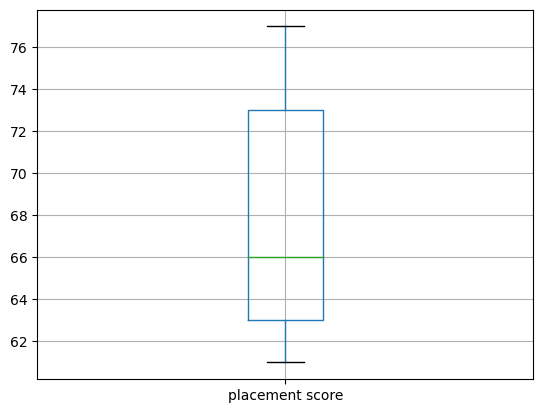

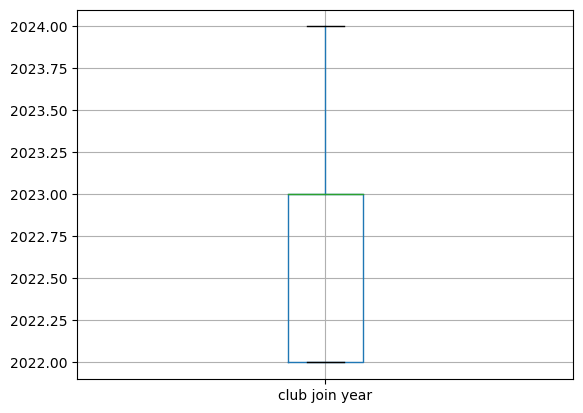

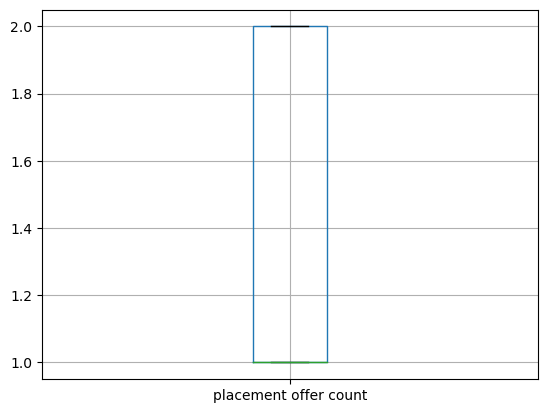

In [88]:
for column in df:
  plt.figure()
  df.boxplot([column])

In [89]:
import seaborn as sns

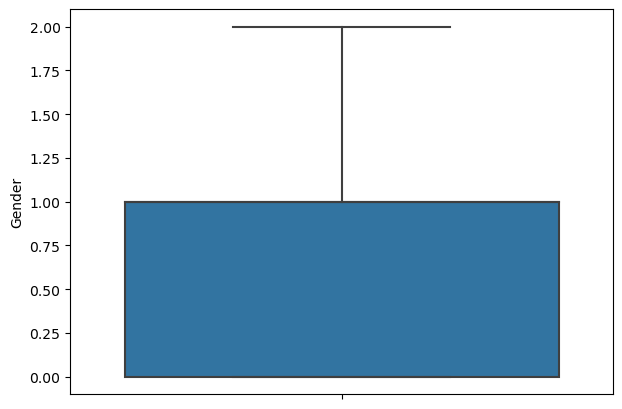

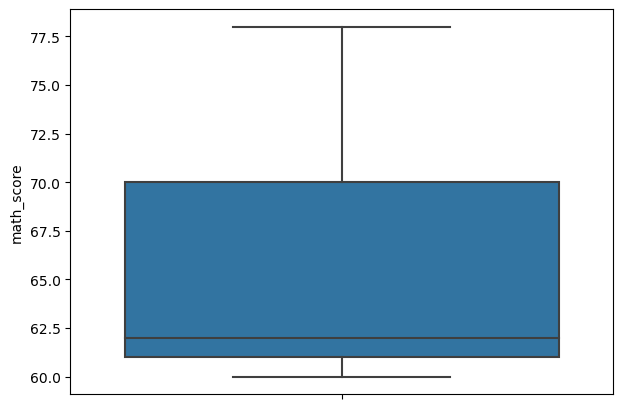

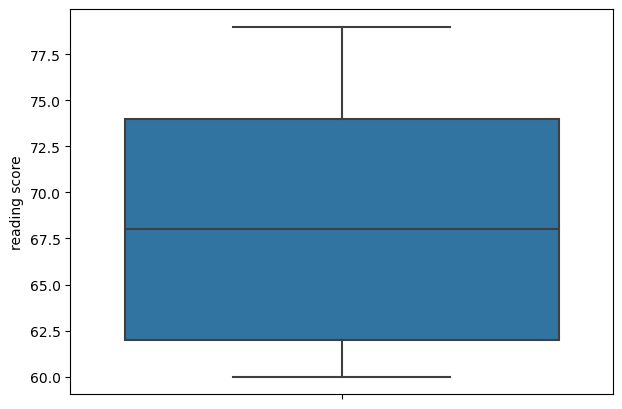

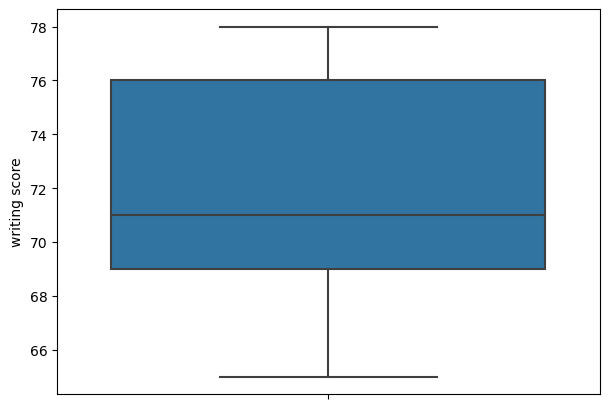

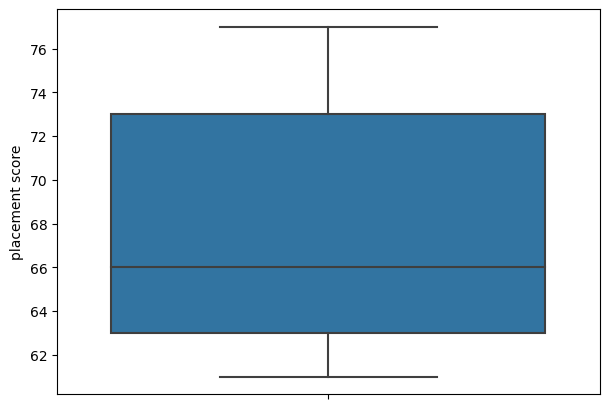

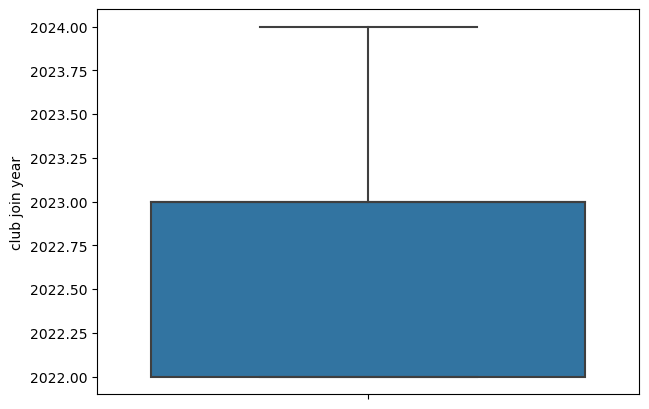

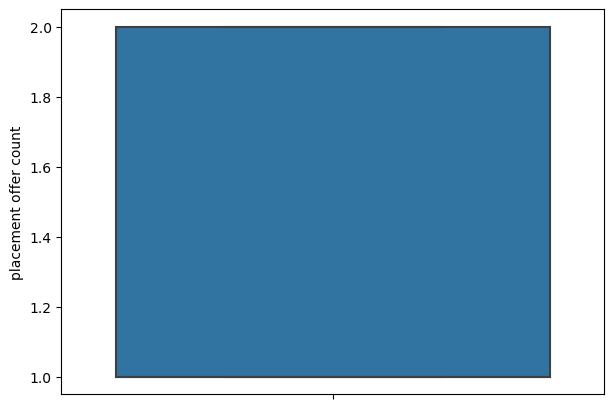

In [90]:
for column in df:
  plt.figure(figsize=(7,5))
  sns.boxplot(data=df, y=column)

In [91]:
print(np.where(df['math_score']>80))

(array([], dtype=int64),)


In [92]:
print(np.where(df['reading score']>90))

(array([], dtype=int64),)


In [93]:
print(np.where(df['writing score']<40))

(array([], dtype=int64),)


###2.Detecting outliers using Scatterplot:

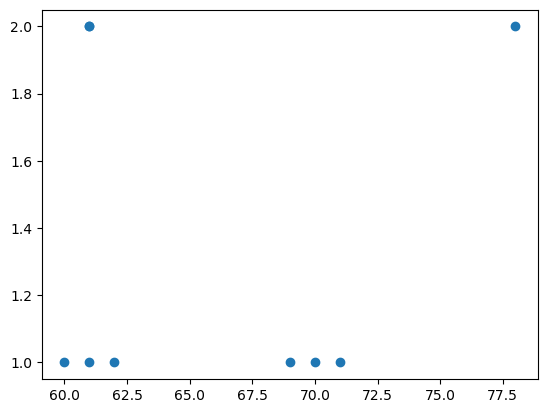

In [94]:
#ax = plt.subplots(figsize = (18,10))
plt.scatter(df['math_score'],df['placement offer count'])
plt.show()

In [95]:
df.columns

Index(['Gender', 'math_score', 'reading score', 'writing score',
       'placement score', 'club join year', 'placement offer count'],
      dtype='object')

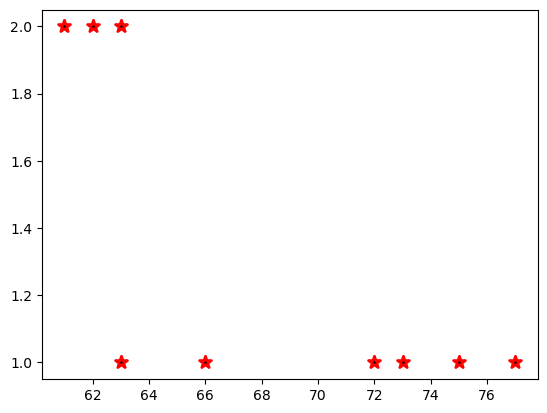

In [96]:
plt.scatter(df['placement score'],df['placement offer count'],c='black',linewidths = 2,marker='*',edgecolor='red',s=80)
plt.xlabel=("placement score")
plt.ylabel=("placement offer count")
plt.show()

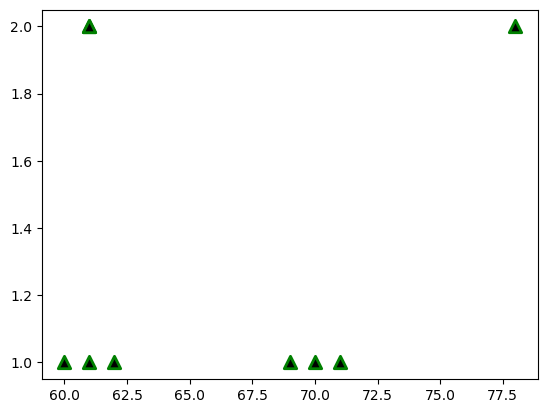

In [97]:
plt.scatter(x=df['math_score'],y=df['placement offer count'],c='black',linewidths=2,marker='^',edgecolor='green',s=80)
plt.show()

<Figure size 640x480 with 0 Axes>

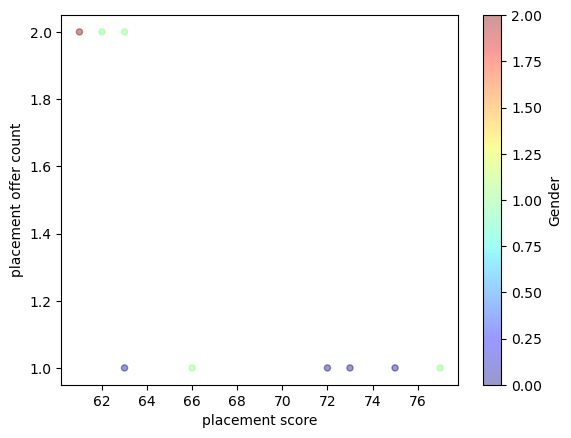

In [98]:
plt.figure()
df.plot.scatter(x='placement score',y='placement offer count',c='Gender',alpha = 0.4,cmap= plt.get_cmap('jet'),colorbar='red' )
#plt.savefig('scatter plot.png')
#plt.tight_layout()
plt.show()


###3.Detecting outlires using Z-Score:

In [99]:
z = np.abs(stats.zscore(df['math_score']))
z

0    0.855971
1    0.818755
2    0.818755
3    2.028280
4    0.651283
5    0.818755
6    0.521026
7    0.986228
8    0.688499
Name: math_score, dtype: float64

In [100]:
threshold = 1.8
sample_outliers = np.where(z >threshold)
sample_outliers

(array([3], dtype=int64),)

In [101]:
df['math_score']

0    71
1    61
2    61
3    78
4    62
5    61
6    69
7    60
8    70
Name: math_score, dtype: int64

###4.Detecting ouliers using Inter Quantile Range(IQR):

In [102]:
sorted_rscore = sorted(df['reading score'])
sorted_rscore

[60, 61, 62, 66, 68, 68, 74, 75, 79]

In [103]:
#calculate and print Quartile 1 and Quartile 3
q1 = np.percentile(sorted_rscore, 25)
q3 = np.percentile(sorted_rscore, 75)
print(q1,q3)

62.0 74.0


In [104]:
IQR= q3-q1
IQR

12.0

In [105]:
lwr_bound = q1-(1.5*IQR)
upr_bound = q3+(1.5*IQR)
print(lwr_bound,upr_bound)

44.0 92.0


In [106]:
r_outliers = []
for i in sorted_rscore:
  if(i<lwr_bound or i>upr_bound):
    r_outliers.append(i)
    print(r_outliers)

In [107]:
df['reading score']

0    60
1    68
2    61
3    75
4    68
5    66
6    74
7    62
8    79
Name: reading score, dtype: int64

##Handling of Outliers:

###1.Triming/removing the Outliers

In [108]:
new_df=df.copy()
for i in sample_outliers:
  new_df.drop(i,inplace=True)
  new_df

###2.Quantile based flooring and capping

In [109]:
df_stud=df.copy()

In [110]:
df_stud

,Gender,math_score,reading score,writing score,placement score,club join year,placement offer count
0,1,71,60,74,66,2023,1
1,0,61,68,65,72,2024,1
2,2,61,61,78,61,2022,2
3,1,78,75,76,62,2024,2
4,0,62,68,69,75,2023,1
5,1,61,66,76,63,2023,2
6,0,69,74,71,73,2022,1
7,1,60,62,67,77,2022,1
8,0,70,79,69,63,2023,1


In [111]:
print(df_stud['math_score'].quantile(0.10))
print(df_stud['math_score'].quantile(0.90))


60.8
72.4


In [112]:
df_stud1=df_stud.copy()
a = np.where(df_stud['math_score']<62.0, 62.0,df_stud1['math_score'])
b = np.where(df_stud['math_score']>79.1, 79.1,df_stud['math_score'])

In [113]:
print("a=",a)
print("b=",b)

a= [71. 62. 62. 78. 62. 62. 69. 62. 70.]
b= [71. 61. 61. 78. 62. 61. 69. 60. 70.]


In [114]:
df_stud.insert(1,"new_math<62",a,True)
df_stud.insert(1,"new_math>79.1",b,True)
df_stud

,Gender,new_math>79.1,new_math<62,math_score,reading score,writing score,placement score,club join year,placement offer count
0,1,71.0,71.0,71,60,74,66,2023,1
1,0,61.0,62.0,61,68,65,72,2024,1
2,2,61.0,62.0,61,61,78,61,2022,2
3,1,78.0,78.0,78,75,76,62,2024,2
4,0,62.0,62.0,62,68,69,75,2023,1
5,1,61.0,62.0,61,66,76,63,2023,2
6,0,69.0,69.0,69,74,71,73,2022,1
7,1,60.0,62.0,60,62,67,77,2022,1
8,0,70.0,70.0,70,79,69,63,2023,1


#Imputing median value

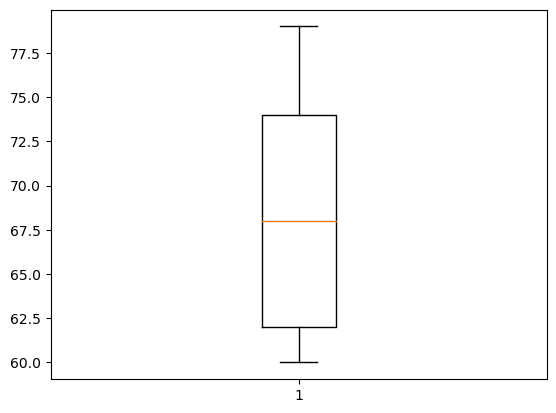

In [115]:
#col = ['reading score]
plt.boxplot(df['reading score'])
plt.show()

In [116]:
median= np.median(sorted_rscore)
median

68.0

In [117]:
new_df = df.copy()
new_df2=new_df.copy()
new_df

,Gender,math_score,reading score,writing score,placement score,club join year,placement offer count
0,1,71,60,74,66,2023,1
1,0,61,68,65,72,2024,1
2,2,61,61,78,61,2022,2
3,1,78,75,76,62,2024,2
4,0,62,68,69,75,2023,1
5,1,61,66,76,63,2023,2
6,0,69,74,71,73,2022,1
7,1,60,62,67,77,2022,1
8,0,70,79,69,63,2023,1


In [118]:
new_df['reading score'] = np.where(new_df['reading score']>upr_bound, 73.0, new_df['reading score'])

In [119]:
new_df.insert(2,"old_reading score",new_df2['reading score'],True)

In [120]:
new_df

,Gender,math_score,old_reading score,reading score,writing score,placement score,club join year,placement offer count
0,1,71,60,60.0,74,66,2023,1
1,0,61,68,68.0,65,72,2024,1
2,2,61,61,61.0,78,61,2022,2
3,1,78,75,75.0,76,62,2024,2
4,0,62,68,68.0,69,75,2023,1
5,1,61,66,66.0,76,63,2023,2
6,0,69,74,74.0,71,73,2022,1
7,1,60,62,62.0,67,77,2022,1
8,0,70,79,79.0,69,63,2023,1


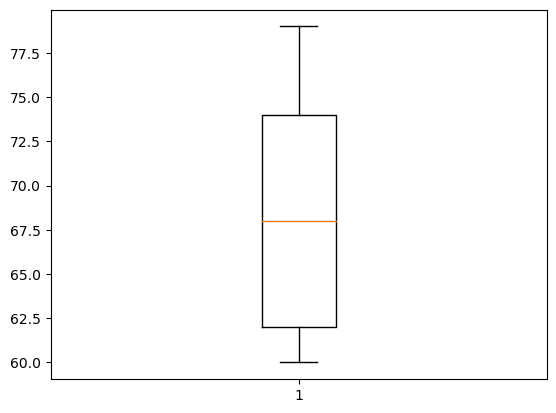

In [121]:
plt.boxplot(new_df['reading score'])
plt.show()